## Week 3 Assignment - Wonyong Kyung

### Import two dataset

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Iris dataset
from sklearn import datasets
iris = datasets.load_iris()
df = pd.DataFrame(iris.data,columns=iris.feature_names)

#Plantgrowth dataframe
import pandas as pd
data = { "weight": [4.17, 5.58, 5.18, 6.11, 4.50, 4.61, 5.17, 4.53, 5.33, 5.14, 4.81, 4.17, 4.41, 3.59, 5.87, 3.83, 6.03, 4.89, 4.32, 4.69, 6.31, 5.12, 5.54, 5.50, 5.37, 5.29, 4.92, 6.15, 5.80, 5.26], "group": ["ctrl"] * 10 + ["trt1"] * 10 + ["trt2"] * 10}
PlantGrowth = pd.DataFrame(data)

### 1. Using the iris dataset
### a. Make a histogram of the variable sepal.Width.

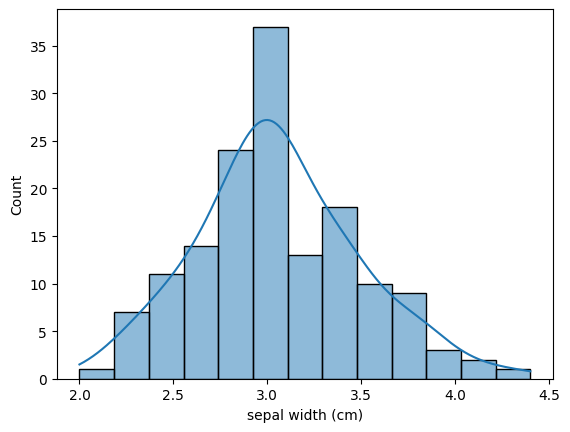

In [68]:
sns.histplot(df['sepal width (cm)'],kde=True, edgecolor='black')
plt.show()

### b. Based on the histogram from #1a, which would you expect to be higher, the mean or the median? why?

From the histogram, I can see that the distribution is slightly skewed to the right, so it is expected that the mean value is larger than the median value.

### c. Confirm your answer to #1b by actually finding these values.

In [69]:
print('mean:',df['sepal width (cm)'].mean())
print('median:',df['sepal width (cm)'].median())

mean: 3.0573333333333337
median: 3.0


### d. Only 27% of the flowers have a sepal.width higher than _____cm.

In [70]:
print('these values are higher than',np.quantile(df['sepal width (cm)'],0.73),'cm')

these values are higher than 3.3 cm


### e. Make scatterplots of each pair of the numerical variables in iris.

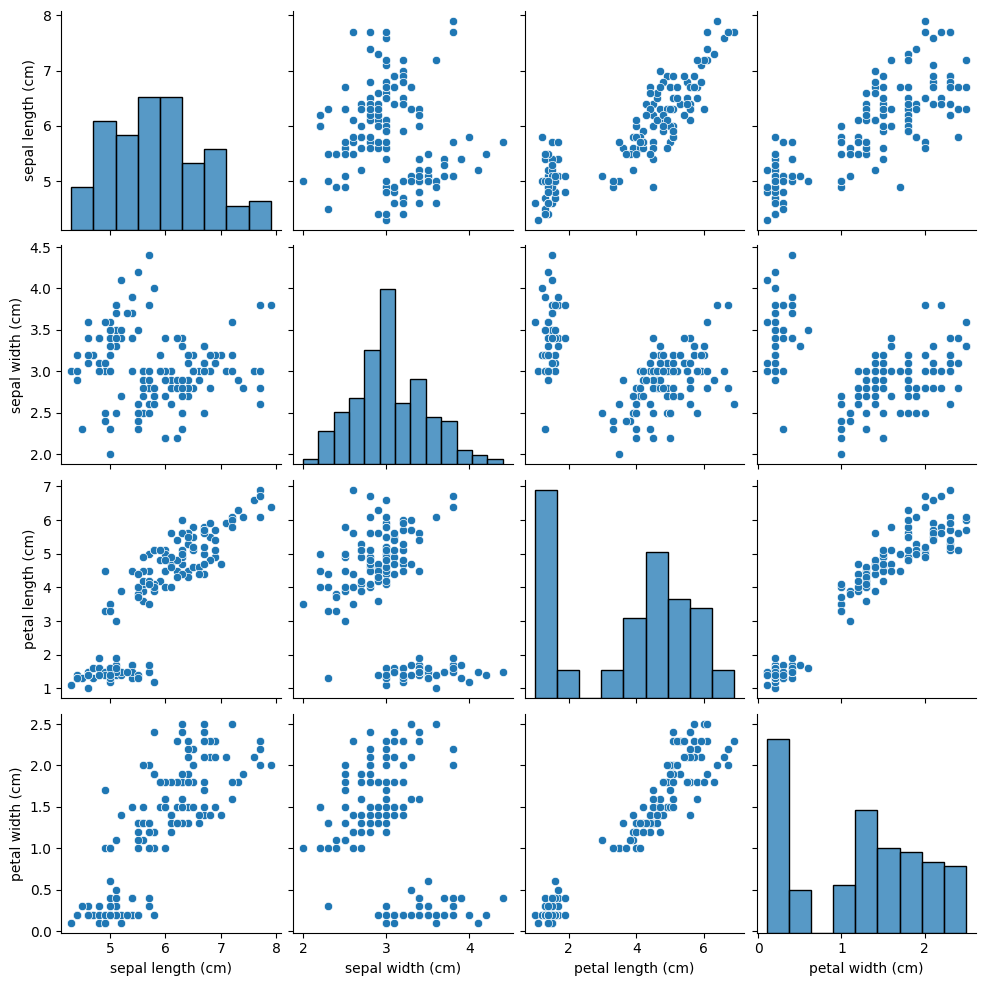

In [71]:
sns.pairplot(df)
plt.show()

### f. Based on #1e, which two variables appear to have the stongest relationship? And which two appear to have the weakest relationship?

In [72]:
df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


From the correlation values between variables, the correlation between petal width and petal length is 0.96, which is very close to 1, indicating the strongest positive relationship. In contrast, the correlation between sepal width and sepal length is -0.11, which is close to 0, indicating the weakest relationship.

### 2. Using the PlantGrowth dataset
### a. Make a histogram of the variable weight with breakpoints (bin edges) at every 0.3units, starting at 3.3

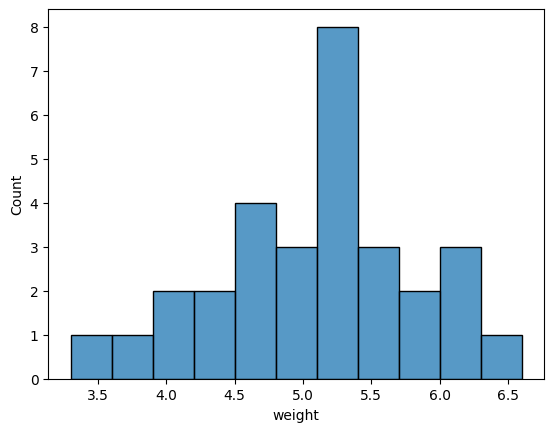

In [73]:
sns.histplot(
    PlantGrowth['weight'],bins=np.arange(3.3,PlantGrowth['weight'].max()+0.3,0.3),
    edgecolor='black')
plt.show()

### b. Make boxplots of weight separated by group in a single graph.

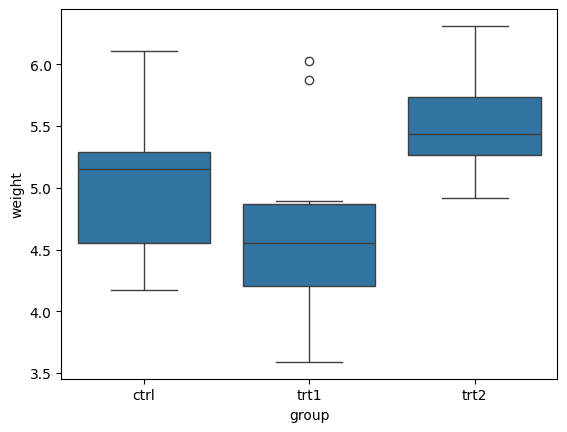

In [74]:
sns.boxplot(x='group',y='weight',data=PlantGrowth)
plt.show()

### c. Based on the boxplots in #2b, approximately what percentage of the "trt1" weights are below the minimum "trt2" weight.

In [75]:
#Except for two outliers, it looks like all values are below the minimum "trt2" weight
trt1_weight = PlantGrowth[PlantGrowth['group'] == 'trt1']['weight']
approx_percent = (len(trt1_weight)-2)/len(trt1_weight) * 100
print('the approximate percentage is', approx_percent, "%")

the approximate percentage is 80.0 %


### d. Find the exact percentage of the "trt1" weights that are below the minimum "trt2" weight.

In [76]:
trt2_weight_min = PlantGrowth[PlantGrowth['group'] == 'trt2']['weight'].min()
count = trt1_weight<trt2_weight_min
print('the exact percentage is',count.sum()/len(trt1_weight)*100,"%")

the exact percentage is 80.0 %


### e. Only including plants with a weight above 5.5, make a barplot of the variable group. Make the barplot coloful using some palette.

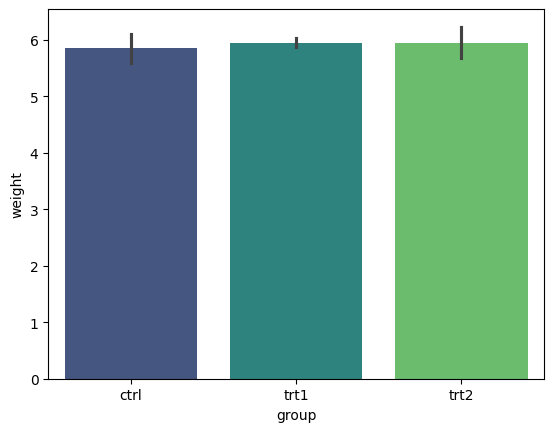

In [79]:
sns.barplot(
    x='group',y='weight',data=PlantGrowth[PlantGrowth['weight']>5.5],
    palette='viridis',hue='group')
plt.show()